# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
# Filtrando o dataframe com os registros da categoria desejada,somando os valores agrupados por cidade e retornando o maior valor
cidade_maior_venda = df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()
print("A cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

A cidade com maior valor de venda para 'Office Supplies': New York City


In [14]:
# Conferindo o resultado
df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico.

In [15]:
# Calculando o total de vendas para cada data de pedido
df2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
df2

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
                ...    
31/10/2017    2346.5790
31/10/2018     523.9280
31/12/2015    5253.2700
31/12/2016    1381.3440
31/12/2017     731.7680
Name: Valor_Venda, Length: 1226, dtype: float64

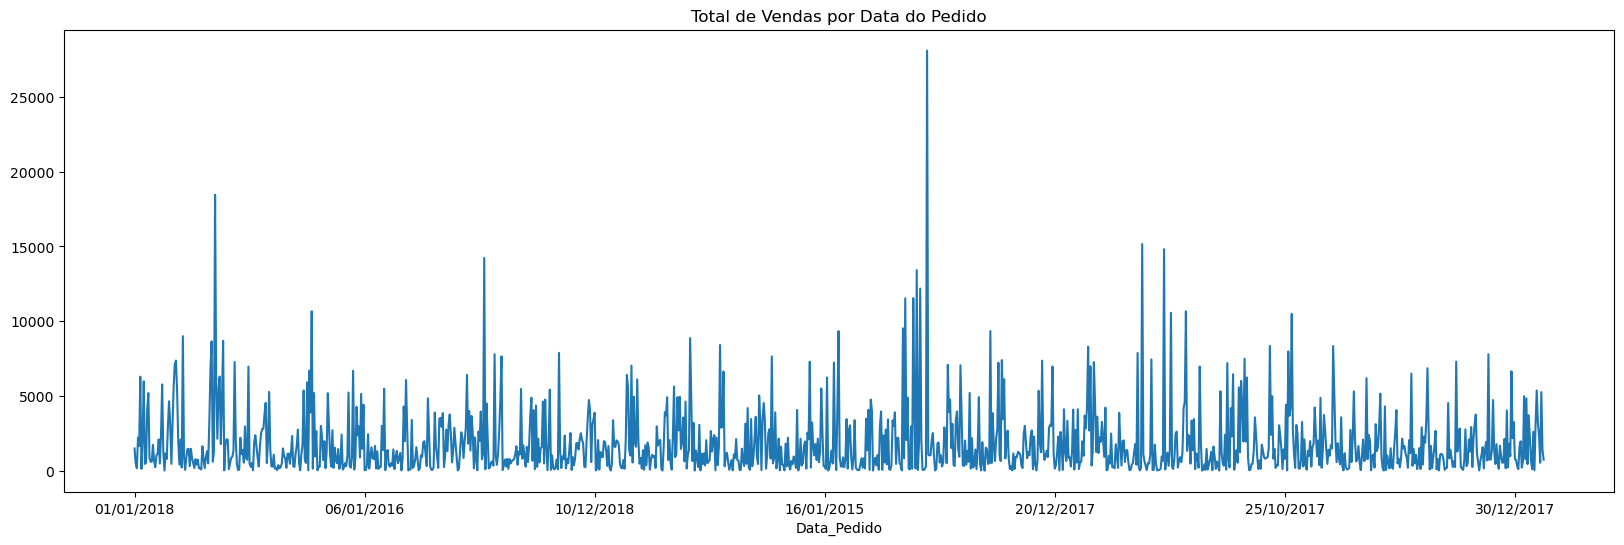

In [16]:
# plot
plt.figure(figsize=(20,6))
df2.plot(x='Data_Pedido', y='Valor_Venda')
plt.title('Total de Vendas por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [17]:
# Agrupando por estado e calculando o total de vendas
df3 = df_dsa[['Estado','Valor_Venda']].groupby('Estado').sum().reset_index()
df3

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


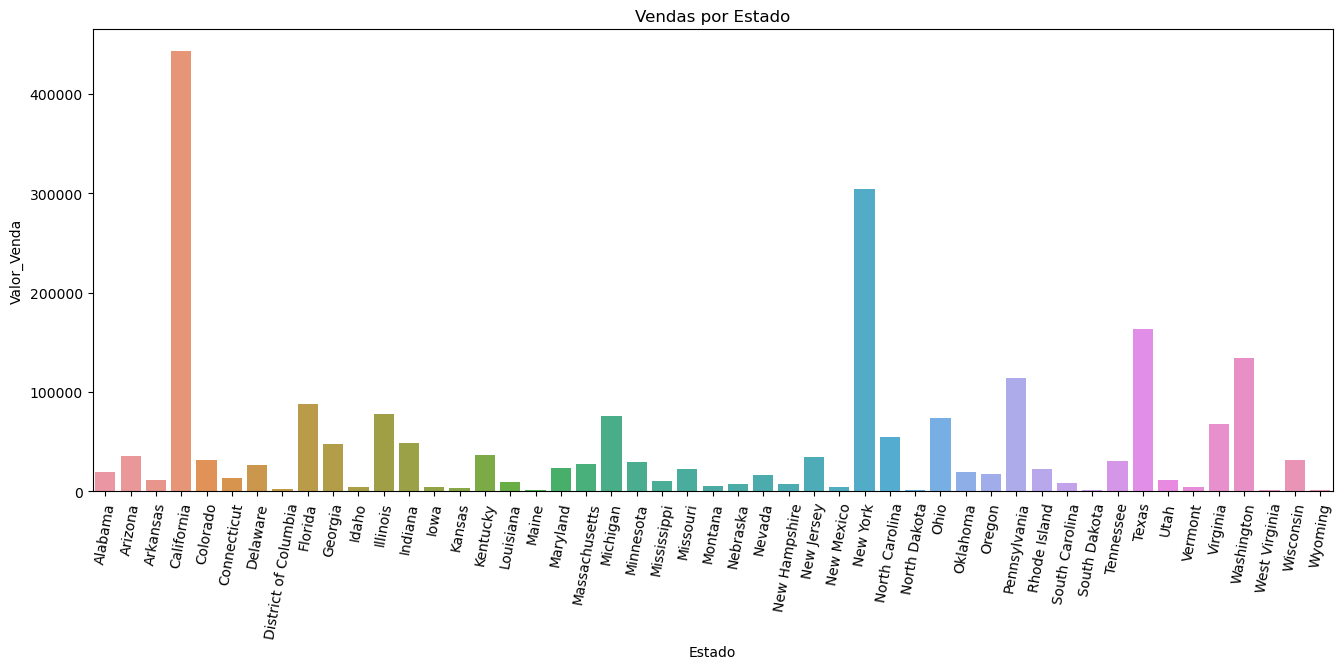

In [18]:
# Plot
plt.figure(figsize=(16,6))
sns.barplot(data = df3,
           y = 'Valor_Venda',
           x = 'Estado').set(title = "Vendas por Estado")
plt.xticks(rotation=80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [19]:
# Agrupando por cidade, calculando o total de vendas e ordenando listando somente os 10 primeiros registros
df4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().nlargest(10, 'Valor_Venda')
df4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


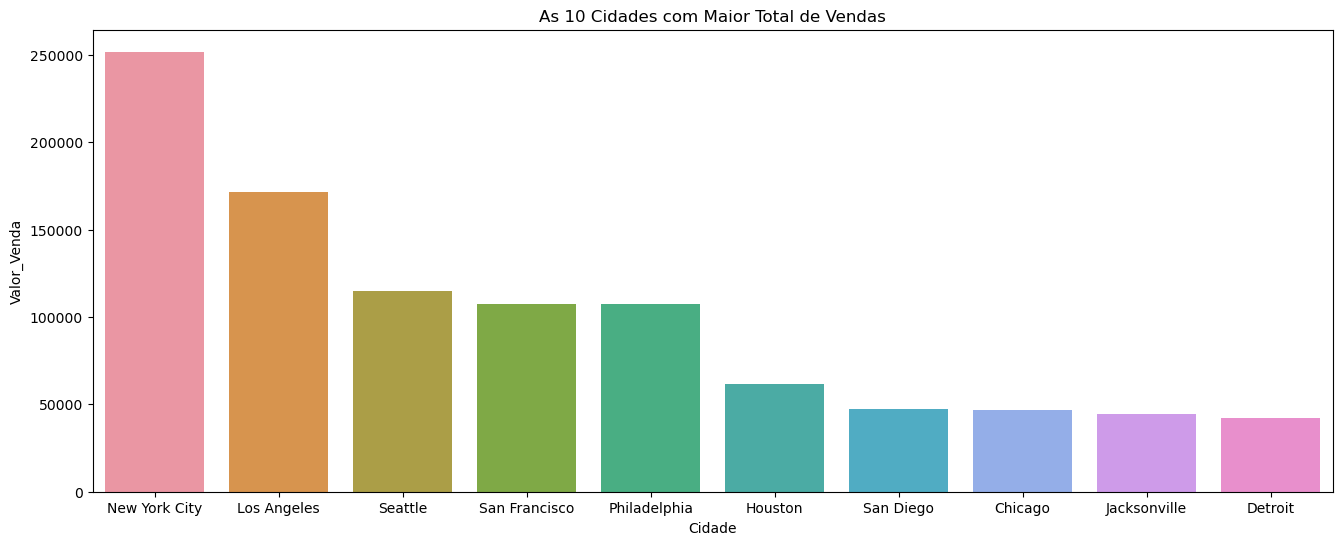

In [20]:
# Plot
plt.figure(figsize=(16,6))
sns.set_palette('coolwarm')
sns.barplot(data = df4,
           y='Valor_Venda',
           x='Cidade').set(title="As 10 Cidades com Maior Total de Vendas")
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [21]:
# Agrupando por segmento e calculando o total de vendas
df5 = df_dsa[['Segmento','Valor_Venda']].groupby('Segmento').sum().reset_index()

# Removendo notação científica
# pd.options.display.float_format = '{:.2f}'.format

df5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [22]:
# Formata os dados para exibir os valores no gráfico 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '$ {v:d}'.format(v=val)
    return my_autopct

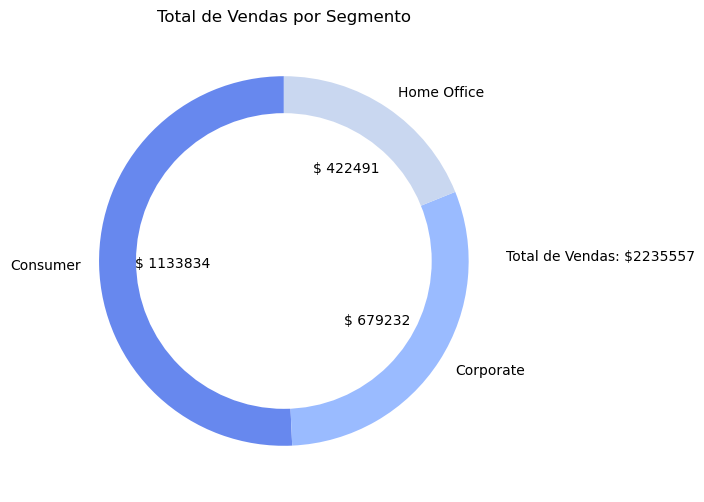

In [23]:
# Plot

# Tamanho da figura
plt.figure(figsize=(16,6))

# Gráfico de pizza
plt.pie(df5['Valor_Venda'],
        labels = df5['Segmento'],
        autopct = make_autopct(df5['Valor_Venda']),
        startangle = 90)

# Limpa círculo central (gráfico de rosca)
centre_circle = plt.Circle((0,0),0.8, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# # Labels e anotações
plt.annotate(text="Total de Vendas: " + "$" + str(int(sum(df5["Valor_Venda"]))), xy = (1.2, 0))
plt.title("Total de Vendas por Segmento")
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [24]:
# Converte coluna de data para o tipo datetime e cria coluna ano
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)
df_dsa['ano'] = df_dsa['Data_Pedido'].dt.year
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [25]:
# Agrupando segmento por ano
df6 = df_dsa[['Segmento','ano','Valor_Venda']].groupby(['ano','Segmento']).sum()
df6

Valor_Venda
ano  Segmento                
2015 Consumer     256719.9166
     Corporate    125819.5957
     Home Office   88229.0878
2016 Consumer     265295.2593
     Corporate    114643.1229
     Home Office   74134.1332
2017 Consumer     288459.5572
     Corporate    203266.7398
     Home Office  103639.6270
2018 Consumer     323359.6019
     Corporate    235502.7284
     Home Office  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [26]:
# Cria coluna que armazena o desconto com base nas regras
df_dsa['Desconto'] = [0.1 if x < 1000 else 0.15 for x in df_dsa['Valor_Venda']]
df_dsa.sample(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano,Desconto
4757,CA-2015-121573,2015-11-03,SG-20605,Consumer,United States,New York City,New York,OFF-BI-10003712,Office Supplies,Binders,7.856,2015,0.1
4159,CA-2016-163587,2016-03-14,EP-13915,Consumer,United States,Dover,New Hampshire,OFF-LA-10004484,Office Supplies,Labels,16.520,2016,0.1
8269,CA-2017-139549,2017-10-20,MY-18295,Corporate,United States,El Cajon,California,FUR-CH-10001802,Furniture,Chairs,387.136,2017,0.1
3341,CA-2017-145982,2017-08-27,TB-21055,Consumer,United States,Quincy,Massachusetts,OFF-PA-10000675,Office Supplies,Paper,122.970,2017,0.1
7561,US-2017-166660,2017-01-30,TB-21250,Consumer,United States,Seattle,Washington,FUR-CH-10001190,Furniture,Chairs,435.168,2017,0.1


In [27]:
# Filtro para saber quantas vendas receberiam 15% de desconto
venda_desconto = df_dsa.query('Desconto == 0.15').Desconto.count()
print(f"No total {venda_desconto} receberiam 15% de desconto")

No total 457 receberiam 15% de desconto


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [28]:
# Criando coluna de Valor Final com os valores aplicando os descontos 
df_dsa["Valor_com_Desconto"] = list(map(lambda x,y: x-(x*y), df_dsa["Valor_Venda"], df_dsa["Desconto"]))
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano,Desconto,Valor_com_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [29]:
# Verificando a média de cada coluna
media_valor_venda = df_dsa.loc[df_dsa["Desconto"] == 0.15, "Valor_Venda"].mean()
media_valor_com_desconto = df_dsa.loc[df_dsa["Desconto"] == 0.15, "Valor_com_Desconto"].mean()

print("A Média do Valor de Venda Antes do Desconto é R$ {:.2f} e Depois do Desconto é R$ {:.2f}".format(media_valor_venda, media_valor_com_desconto))

A Média do Valor de Venda Antes do Desconto é R$ 2116.81 e Depois do Desconto é R$ 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [30]:
# Criando coluna com os valores dos meses
df_dsa['mes'] = df_dsa['Data_Pedido'].dt.month

# Agrupando por ano, mês e segmento
df7 = df_dsa.groupby(['ano','mes','Segmento'])['Valor_Venda'].agg([np.mean, np.sum])

# Extraindo os níveis
anos = df7.index.get_level_values(0)
meses = df7.index.get_level_values(1)
segmentos = df7.index.get_level_values(2)

df7

mean         sum
ano  mes Segmento                           
2015 1   Consumer     146.736787   6896.6290
         Corporate    130.886769   1701.5280
         Home Office  329.855882   5607.5500
     2   Consumer     117.327926   3167.8540
         Corporate     69.235333    623.1180
...                          ...         ...
2018 11  Corporate    341.215278  44357.9862
         Home Office  247.519423  24009.3840
     12  Consumer     183.616244  48107.4558
         Corporate    153.167403  20524.4320
         Home Office  224.523983  13022.3910

[144 rows x 2 columns]

<Figure size 1200x600 with 0 Axes>

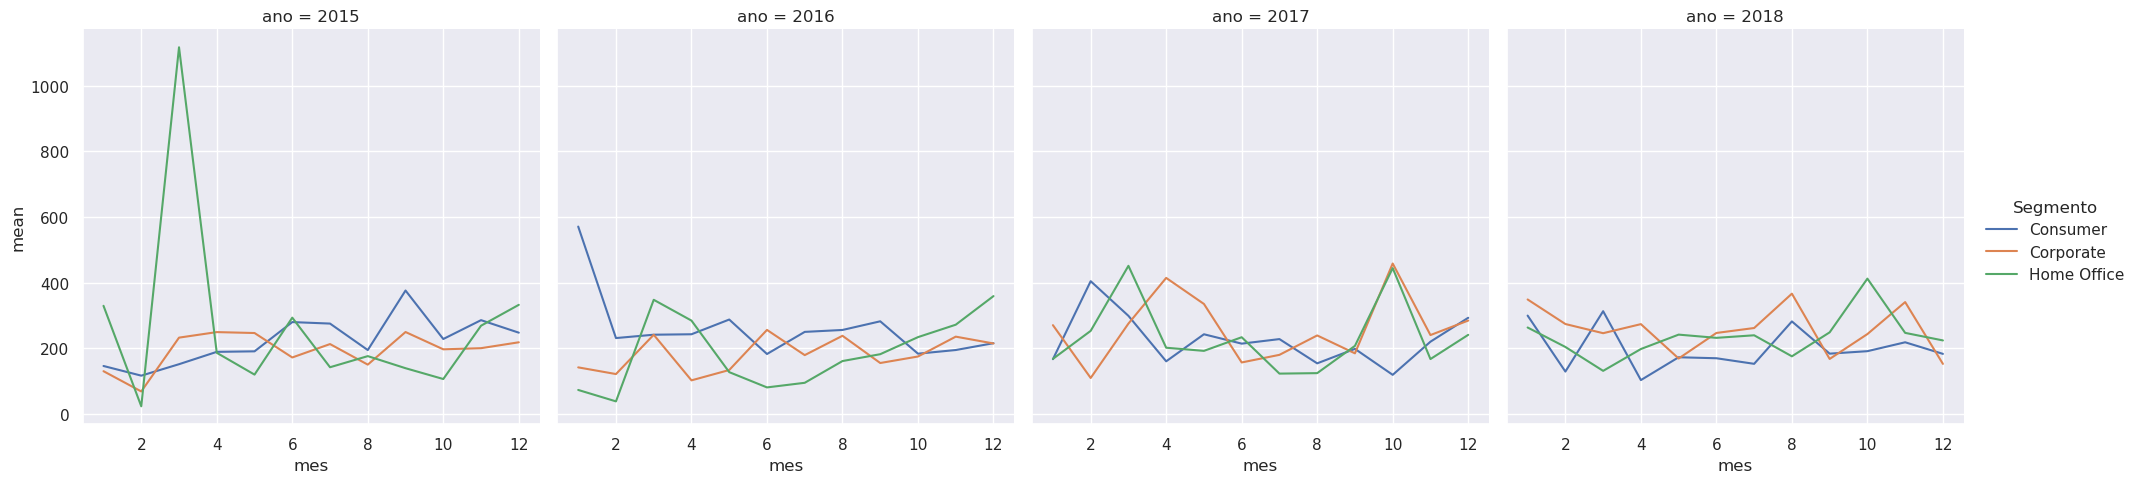

In [37]:
# Plots
plt.figure(figsize=(12,6))
sns.set()

fig1 = sns.relplot(kind = 'line',
                   data = df7,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 4)

plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [32]:
# Agrupando por categoria e subcategoria e somando os valores numéricos
df8 = df_dsa.groupby(['Categoria',
                      'SubCategoria']).sum(numeric_only=True).sort_values('Valor_Venda',
                                                                          ascending=False).head(12)
df8

Valor_Venda      ano  Desconto   
Categoria       SubCategoria                                   
Technology      Phones        325271.2940  1748496     90.15  \
Furniture       Chairs        317919.6250  1201942     63.30   
Office Supplies Storage       216188.3620  1663791     84.75   
Furniture       Tables        202083.3600   627193     34.15   
Office Supplies Binders       194723.3810  2964618    149.10   
Technology      Machines      189238.6310   231912     13.65   
                Accessories   162791.3620  1504508     76.10   
                Copiers       146248.0940   133104      8.30   
Furniture       Bookcases     108045.0467   449734     23.50   
Office Supplies Appliances    104061.6930   915604     46.45   
Furniture       Furnishings    88862.7700  1865489     92.75   
Office Supplies Paper          76312.7640  2680255    132.90   

                              Valor_com_Desconto    mes  
Categoria       SubCategoria                             
Technology      Phones              286990.85830   6649  
Furniture       Chairs              279816.75990   4834  
Office Supplies Storage             191433.27010   6548  
Furniture       Tables              176938.45555   2466  
Office Supplies Binders             169623.33495  11451  
Technology      Machines            162213.65840    897  
                Accessories         144162.61990   5982  
                Copiers             125379.85260    516  
Furniture       Bookcases            95035.86235   1706  
Office Supplies Appliances           91938.64420   3583  
Furniture       Furnishings          79694.54640   7301  
Office Supplies Paper                68681.48760  10404

In [33]:
# Convertendo a coluna Valor_Venda em inteiro e classifiando por categoria
df8 = df8[["Valor_Venda"]].astype(int).sort_values(by='Categoria').reset_index()
df8

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [38]:
# Agrupando por categoria e somando os valores numéricos
df8_categoria = df8.groupby('Categoria').sum(numeric_only=True).reset_index()
df8_categoria

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [35]:
cores_categorias = ['#5d00de',
                   '#0ee84f',
                   '#e80e27']

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c950',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

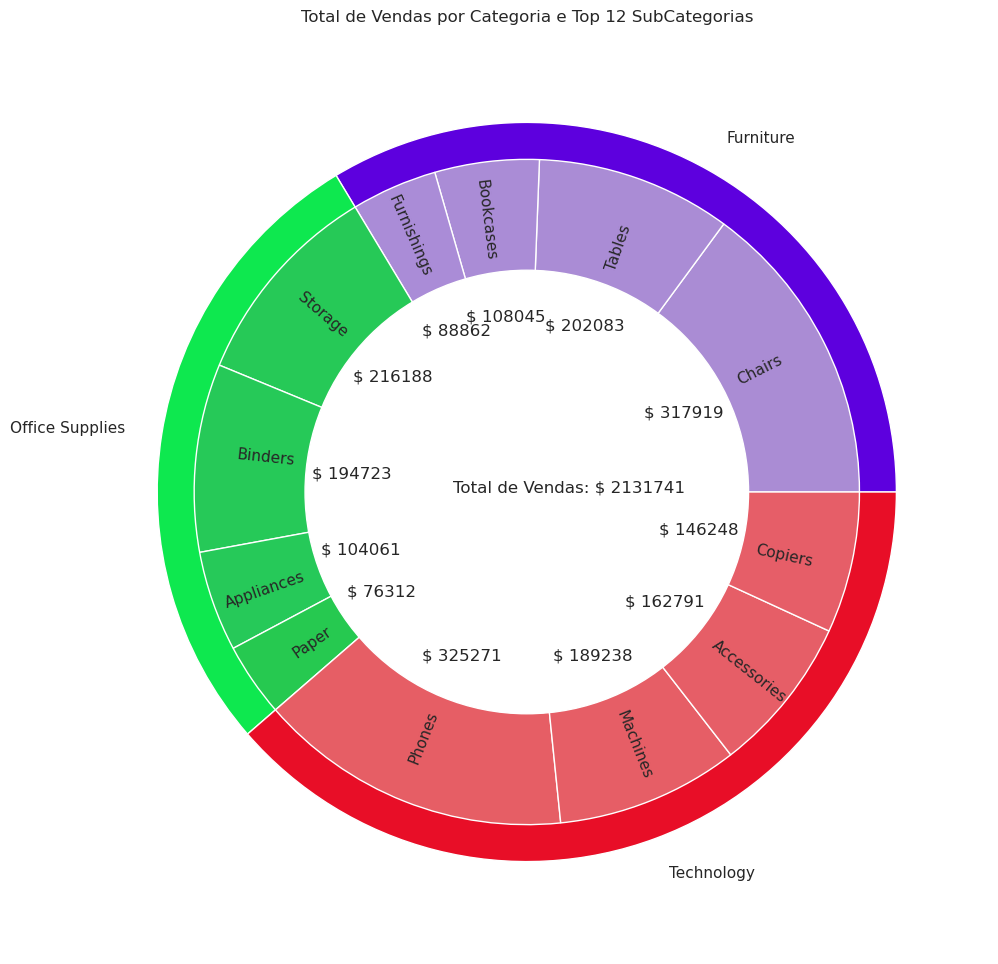

In [39]:
# plot

# tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# gráfico das categorias
p1 = ax.pie(df8_categoria['Valor_Venda'],
            radius = 1,
            labels = df8_categoria['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# grafico das subcategorias
p2 = ax.pie(df8['Valor_Venda'],
            radius = 0.9,
            labels = df8['SubCategoria'],
            autopct = make_autopct(df8['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Centro do círculo
centre_circle = plt.Circle((0,0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df8['Valor_Venda']))), xy = (-0.2,0))
plt.title('Total de Vendas por Categoria e Top 12 SubCategorias')
plt.show()

# Fim